<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/remocoes_gol_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib.dates import HourLocator, DayLocator, DateFormatter, MonthLocator, YearLocator
import calendar


# Data

Conversão para séries de quantidades diárias, semanais e mensais.

In [2]:
remocoes = pd.read_excel('https://github.com/Rogerio-mack/work/raw/main/Remocoes_2013_2023.xlsx')
remocoes.index = pd.to_datetime( remocoes['Rem. Date'] )
remocoes.head()

,Vendor,Part No.,Serial No.,Description,AC Reg.,ATA,WO-No.,Rem. Date,Reason,Order No.,Responsible,Created By,TSN,CSN,TBI,CBI,Removal Type
Rem. Date,,,,,,,,,,,,,,,,,
2023-08-16,07217,1152466-250,071C-0325,APU STARTER CONVERTER UNIT (SCU),GXU,49-40,101093044.0,2023-08-16,"1 WORKSTEP ADDED ON 16.AUG.2023, 00:20 CLOSING...",R77768223,46353.0,15319.0,52189,37795,4117,2760,US
2023-08-16,028787410001,5500A1ABF23A,P10091366,PORTABLE OXYGEN CYLINDER ASSY,GGM,35-31,101104230.0,2023-08-16,"1 WORKSTEP ADDED ON 16.AUG.2023, 04:40 CLOSING...",R77771323,13594.0,13594.0,31231,20226,9820,5878,US
2023-08-16,028787410001,806835-01,C18070925,CREW OXYGEN CYLINDER ASSY,GGJ,35-12,308750287.0,2023-08-16,"1 WORKSTEP ADDED BY 00050313 ON 16.AUG.2023, 0...",R77774123,46473.0,50313.0,6932,4160,346,236,US
2023-08-15,USA079,398908-3,13163,TEMPERATURE CONTROL VALVE,GXQ,21-61,308747212.0,2023-08-15,DUE SEAL MISSING,R77746223,46353.0,31721.0,44939,27920,7849,5328,US
2023-08-15,33126,162BL801,12104615,FUEL TEMP INDICATOR,GUU,28-40,101093054.0,2023-08-15,FUEL TEMP INDICATOR LIGHT INOP,R77746323,6509.0,6509.0,33023,21776,33023,21776,US


In [11]:
remocoes.columns

Index(['Vendor', 'Part No.', 'Serial No.', 'Description', 'AC Reg.', 'ATA',
       'WO-No.', 'Rem. Date', 'Reason', 'Order No.', 'Responsible',
       'Created By', 'TSN', 'CSN', 'TBI', 'CBI', 'Removal Type'],
      dtype='object')

In [12]:
df_daily = remocoes[['TSN', 'CSN', 'TBI', 'CBI']].resample('D').mean()
df_daily.head()

,TSN,CSN,TBI,CBI
Rem. Date,,,,
2013-01-01,14702.388889,10717.166667,3198.055556,2484.111111
2013-01-02,19136.343750,13275.843750,8620.281250,5878.750000
2013-01-03,14945.111111,11359.740741,3123.740741,2304.481481
2013-01-04,18977.176471,13985.666667,6415.921569,4778.333333
2013-01-05,15970.545455,11032.878788,4394.000000,2829.909091


In [13]:
df_weekly = remocoes[['TSN', 'CSN', 'TBI', 'CBI']].resample('W').mean()
df_weekly.head()

,TSN,CSN,TBI,CBI
Rem. Date,,,,
2013-01-06,17652.766497,12913.908629,5471.401015,3943.664975
2013-01-13,17167.539906,12085.530516,5181.084507,3684.399061
2013-01-20,15810.481172,11353.774059,5224.790795,3704.184100
2013-01-27,16479.471698,12002.334906,5324.075472,3907.372642
2013-02-03,17925.097674,12896.753488,6540.976744,4520.962791


In [15]:
df_monthly = remocoes[['TSN', 'CSN', 'TBI', 'CBI']].resample('M').mean()
df_monthly.head()

,TSN,CSN,TBI,CBI
Rem. Date,,,,
2013-01-31,16735.937436,12050.375385,5386.864615,3850.997949
2013-02-28,17480.277249,12663.914286,5819.639153,4261.609524
2013-03-31,16674.177908,11911.565982,5212.094819,3683.291300
2013-04-30,17491.229607,12661.848943,5668.954683,4045.130916
2013-05-31,16958.958743,12172.048134,5011.575639,3629.859528


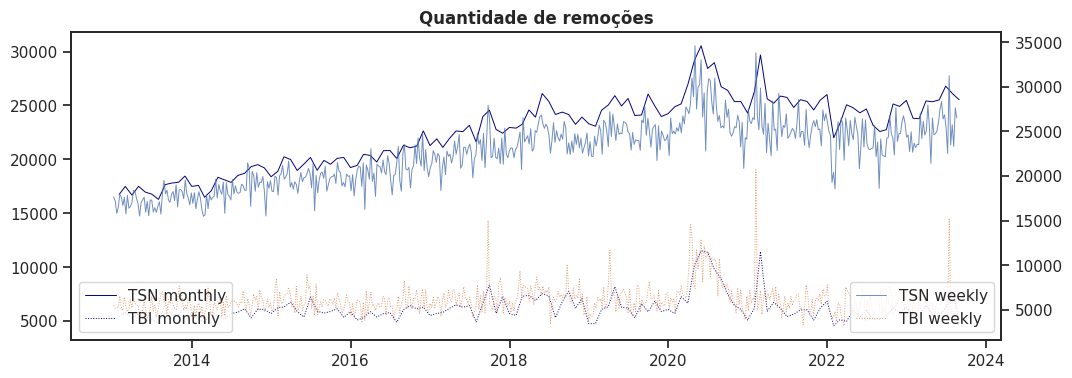

In [26]:
fig, ax = plt.subplots(figsize=(12,4))

# plt.plot(df_daily,label='daily')
ax.plot(df_monthly.TSN,label='TSN monthly',color='navy')
ax.plot(df_monthly.TBI,label='TBI monthly',color='navy',linestyle=':')
plt.legend(loc='lower left')
ax1 = ax.twinx()
ax1.plot(df_weekly.TSN,label='TSN weekly',alpha=0.8)
ax1.plot(df_weekly.TBI,label='TBI weekly',alpha=0.8,linestyle=':')
plt.legend(loc='lower right')

plt.title('Quantidade de remoções',fontsize=12,weight='bold')

plt.show()